.LGBM & XGBM
.Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.



In [1]:
!pip install lightgbm

In [2]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score, precision_score,recall_score,f1_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv(r"C:\Users\durwa\Downloads\titanic train x.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Embarked_mode=df['Embarked'].mode()[0]
Embarked_mode

'S'

In [8]:
Age_median = df['Age'].median()
Age_median

28.0

In [9]:
#these columns are not important so we drop that columns
df.drop(columns=['Ticket'],inplace=True)

In [10]:
df.drop(columns=['Parch'],inplace=True)

In [11]:
df.drop(columns=['PassengerId'],inplace=True)

In [12]:
df.drop(columns=['Cabin'],inplace=True)

In [13]:
df['Age'].fillna(Age_median, inplace=True)

In [14]:
df['Embarked'].fillna(Embarked_mode, inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Fare        float64
Embarked     object
dtype: object

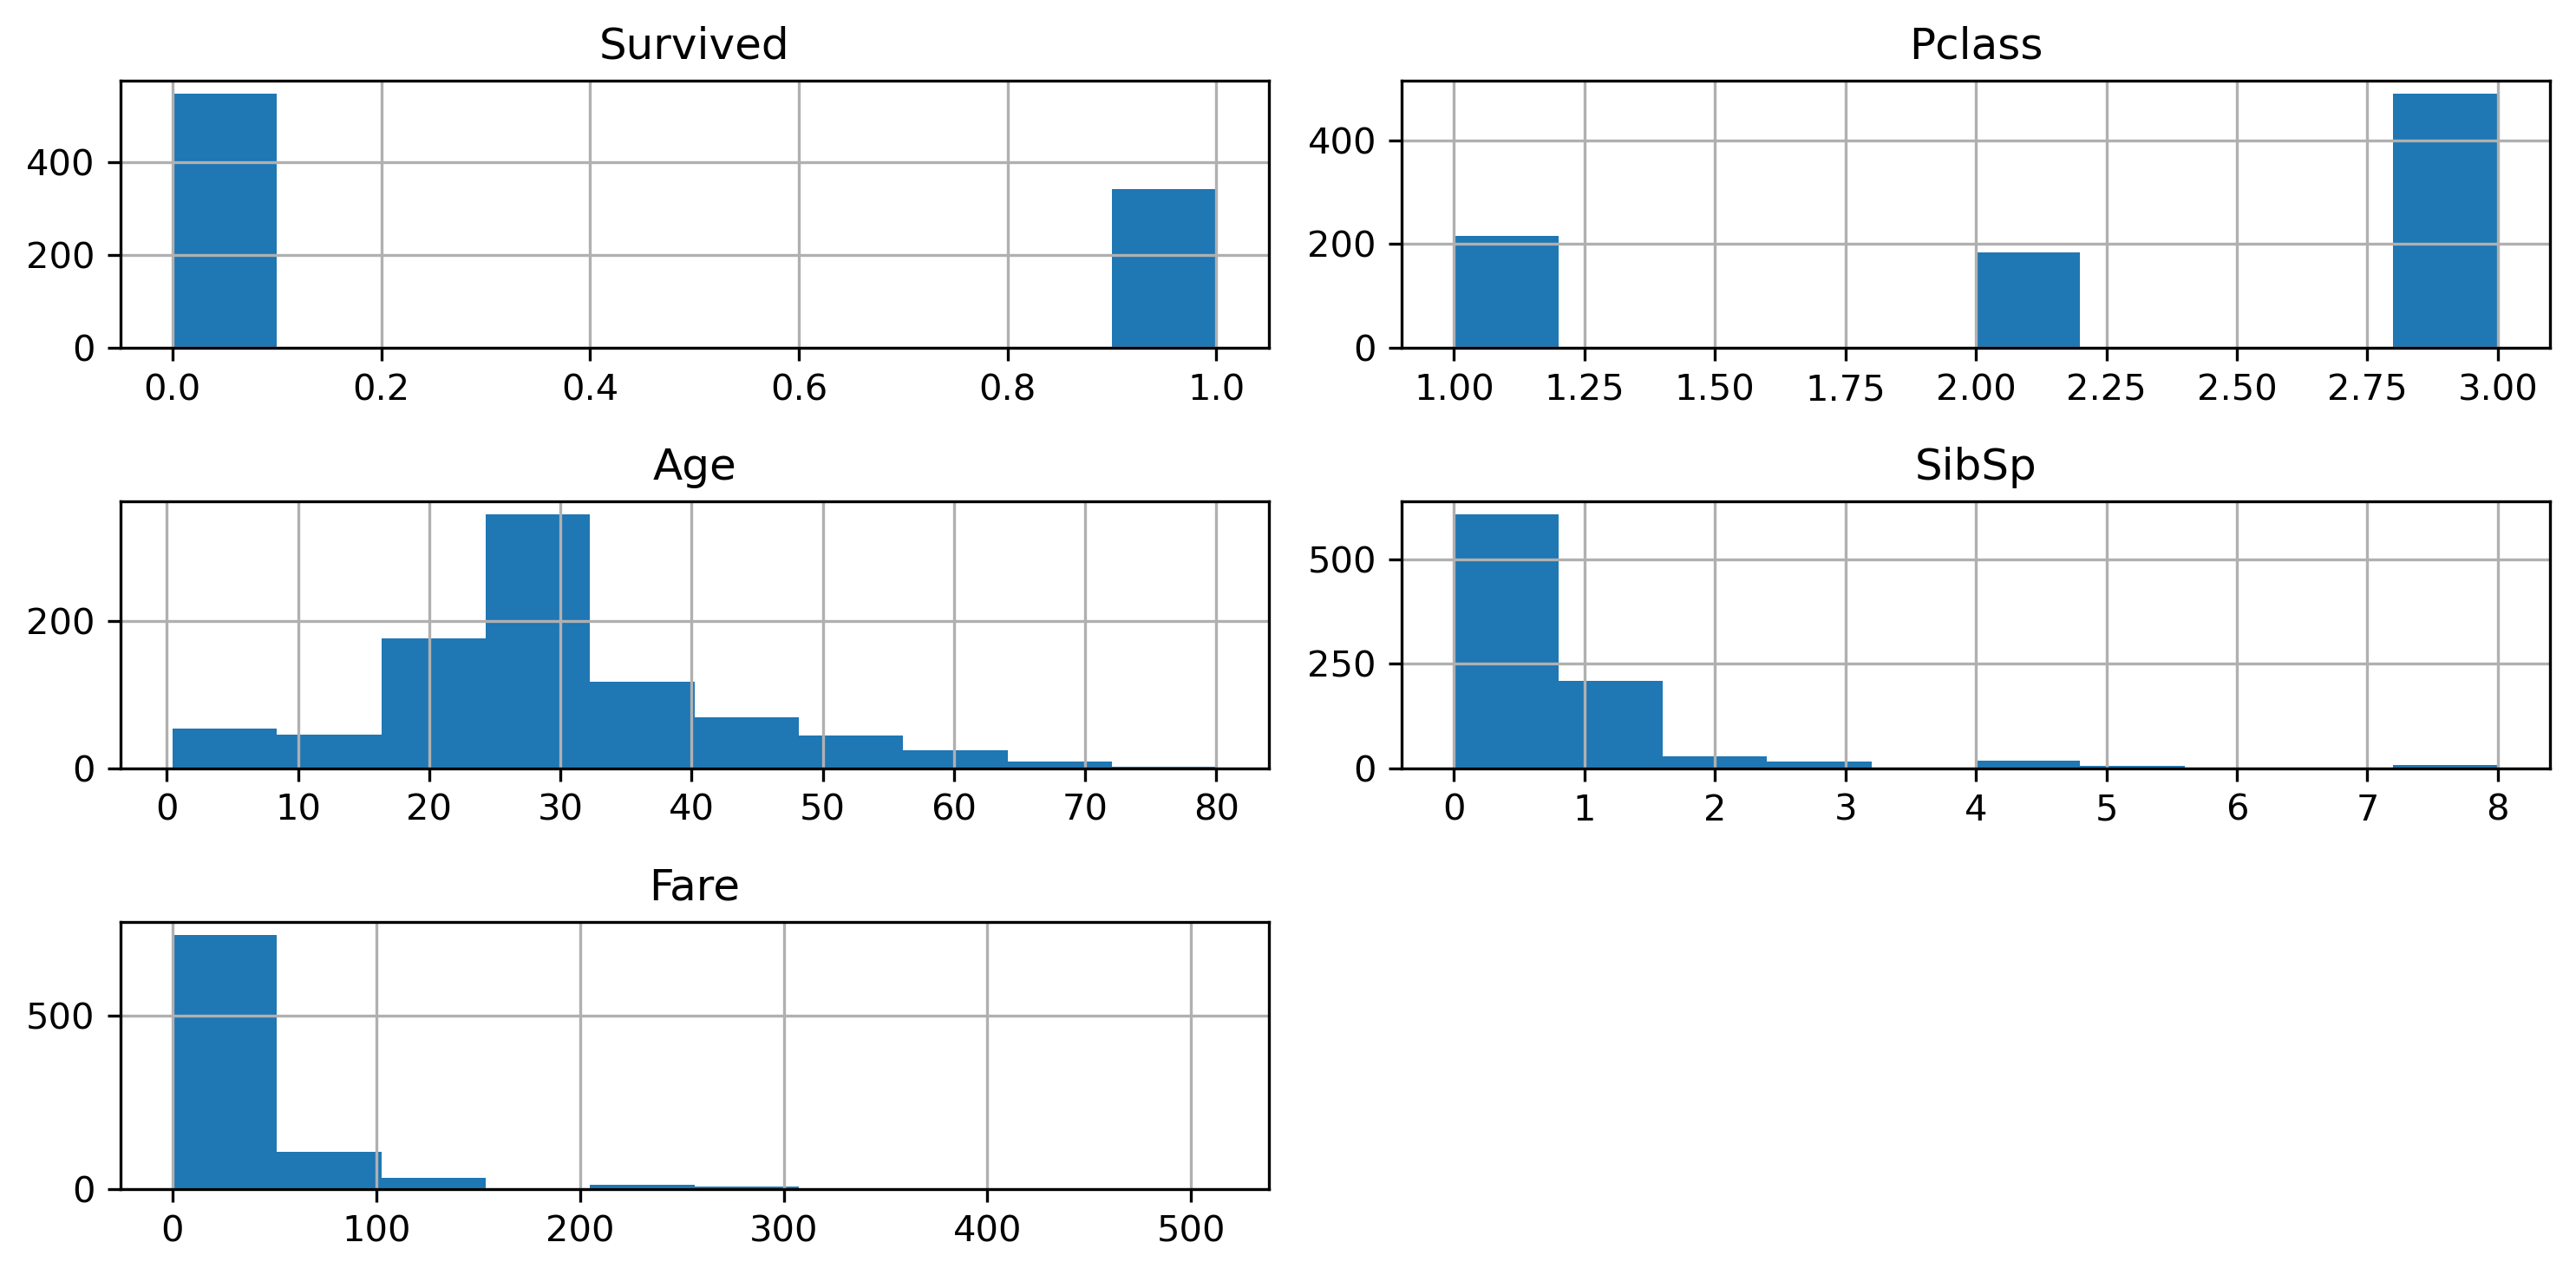

In [17]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
df.hist()
plt.tight_layout()

<Axes: >

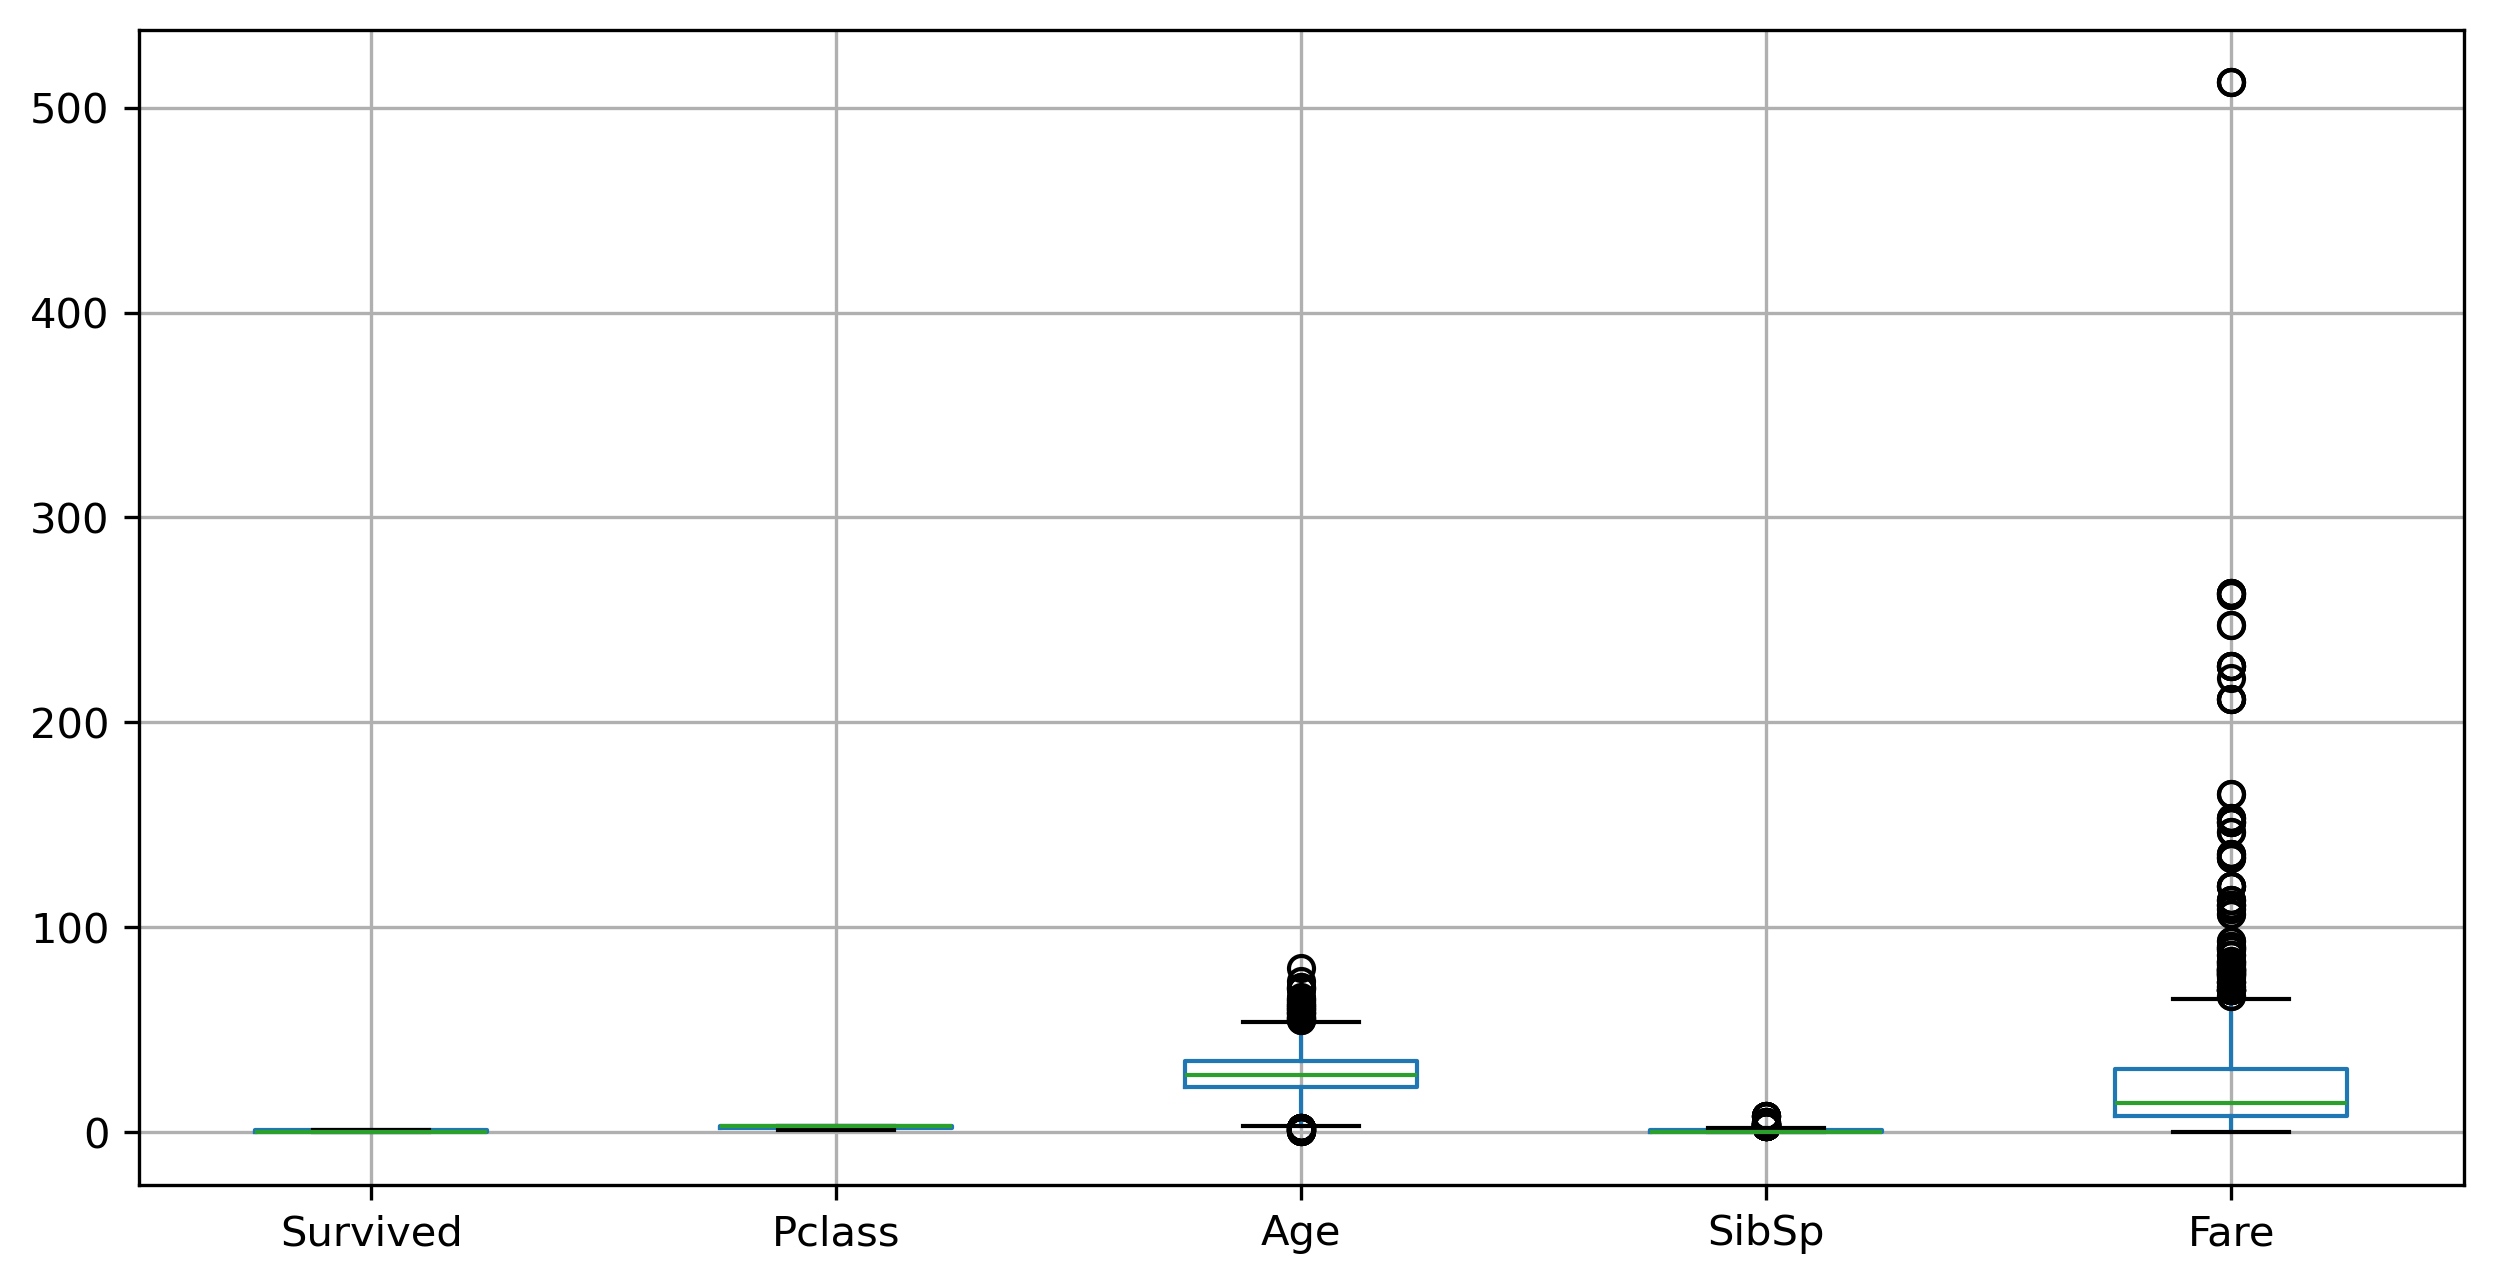

In [18]:
df.boxplot()

In [19]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Fare',
       'Embarked'],
      dtype='object')

In [21]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Fare        float64
Embarked     object
dtype: object

In [22]:
df.drop(columns=['Sex','Embarked','Name']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [23]:
outlier_detection(df,df.drop(columns=['Sex','Embarked','Name']).columns)

<Axes: >

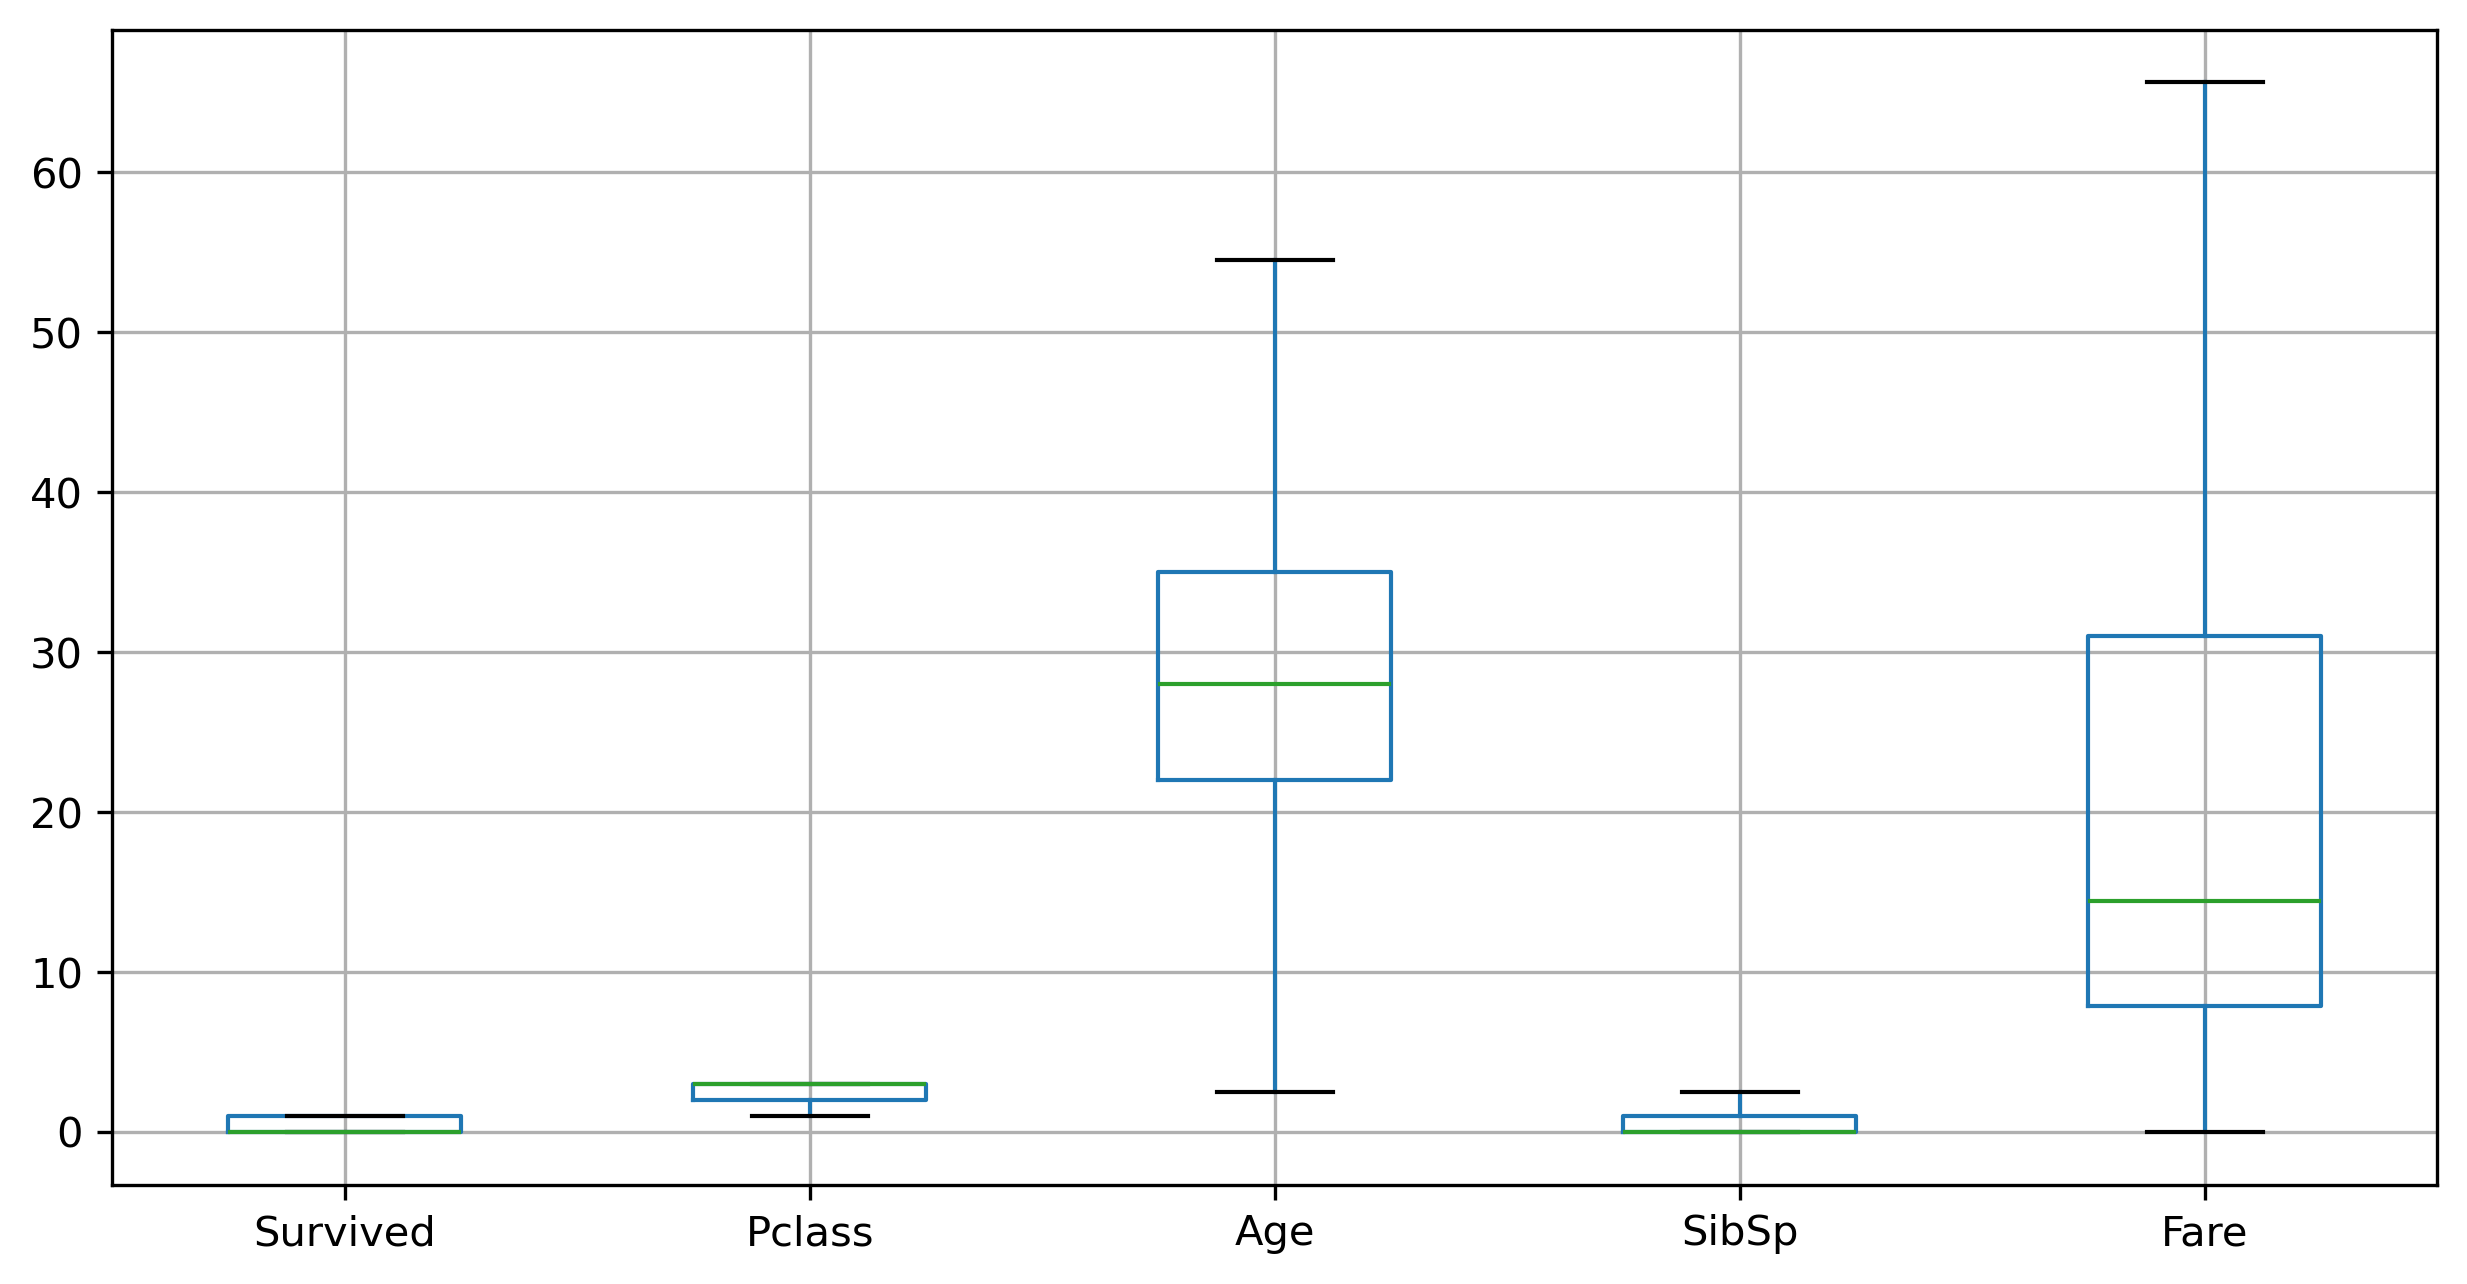

In [24]:
df.boxplot()

In [25]:
#scatter and correlation
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,7.2500,S
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,65.6344,C
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,7.9250,S
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,53.1000,S
4,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,8.0500,S


<Axes: xlabel='Pclass', ylabel='Fare'>

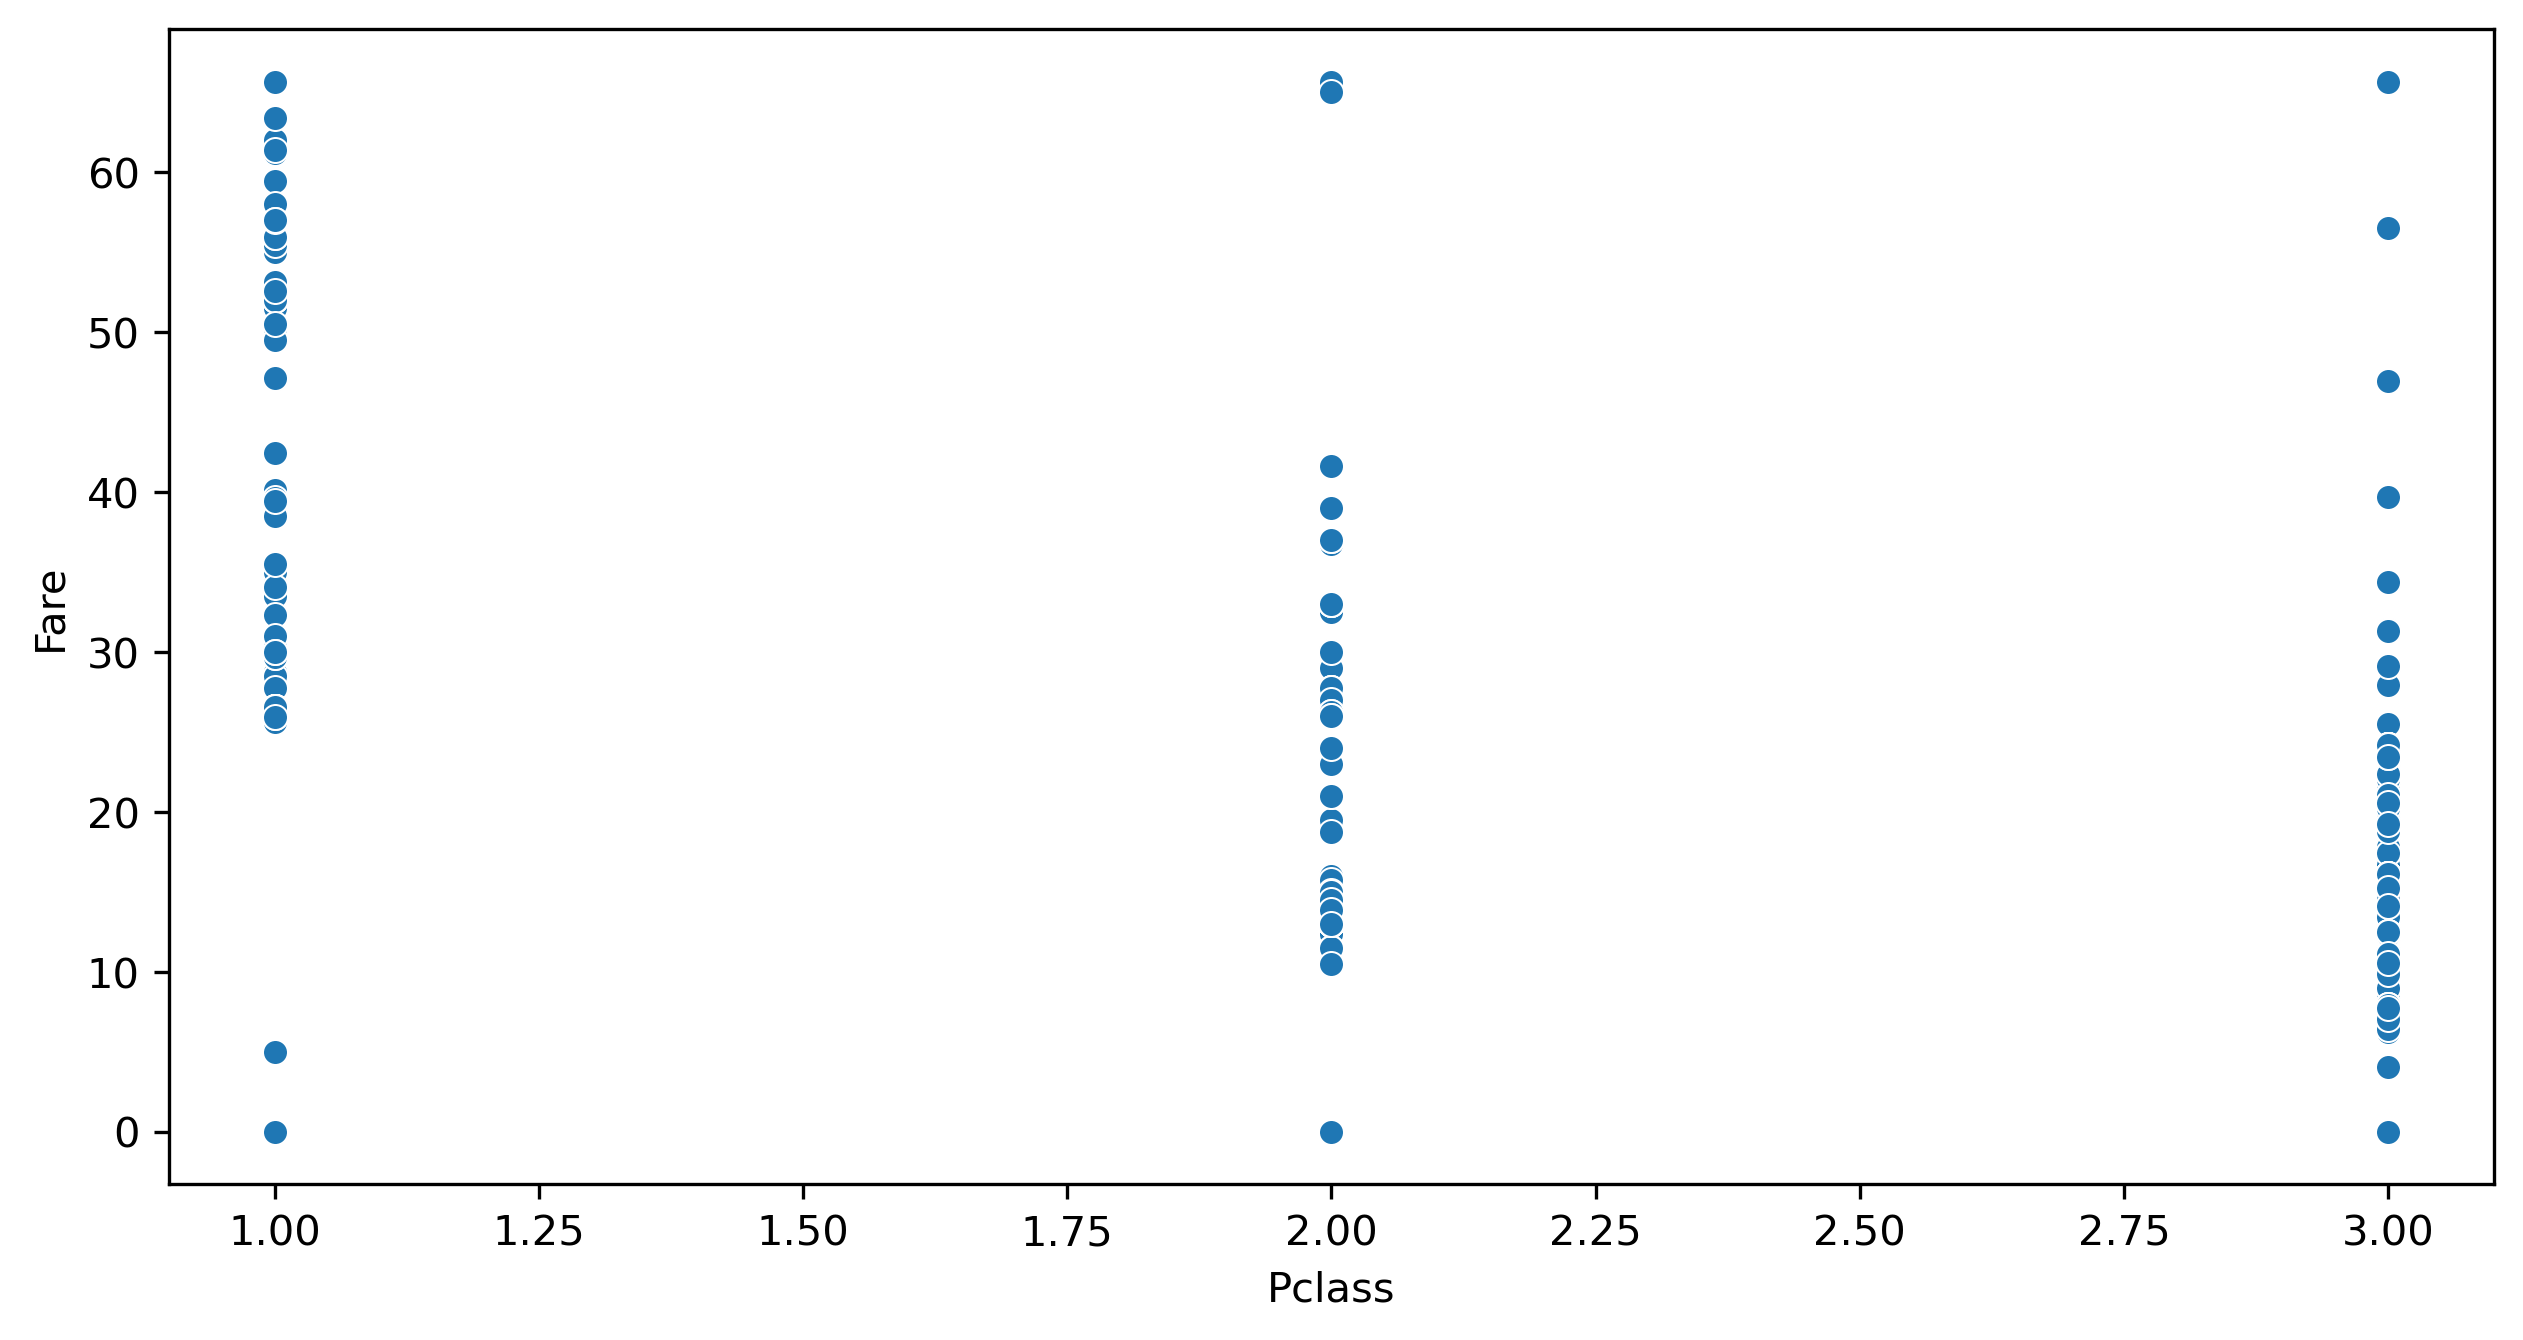

In [26]:
sns.scatterplot(x = df['Pclass'], y =df['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

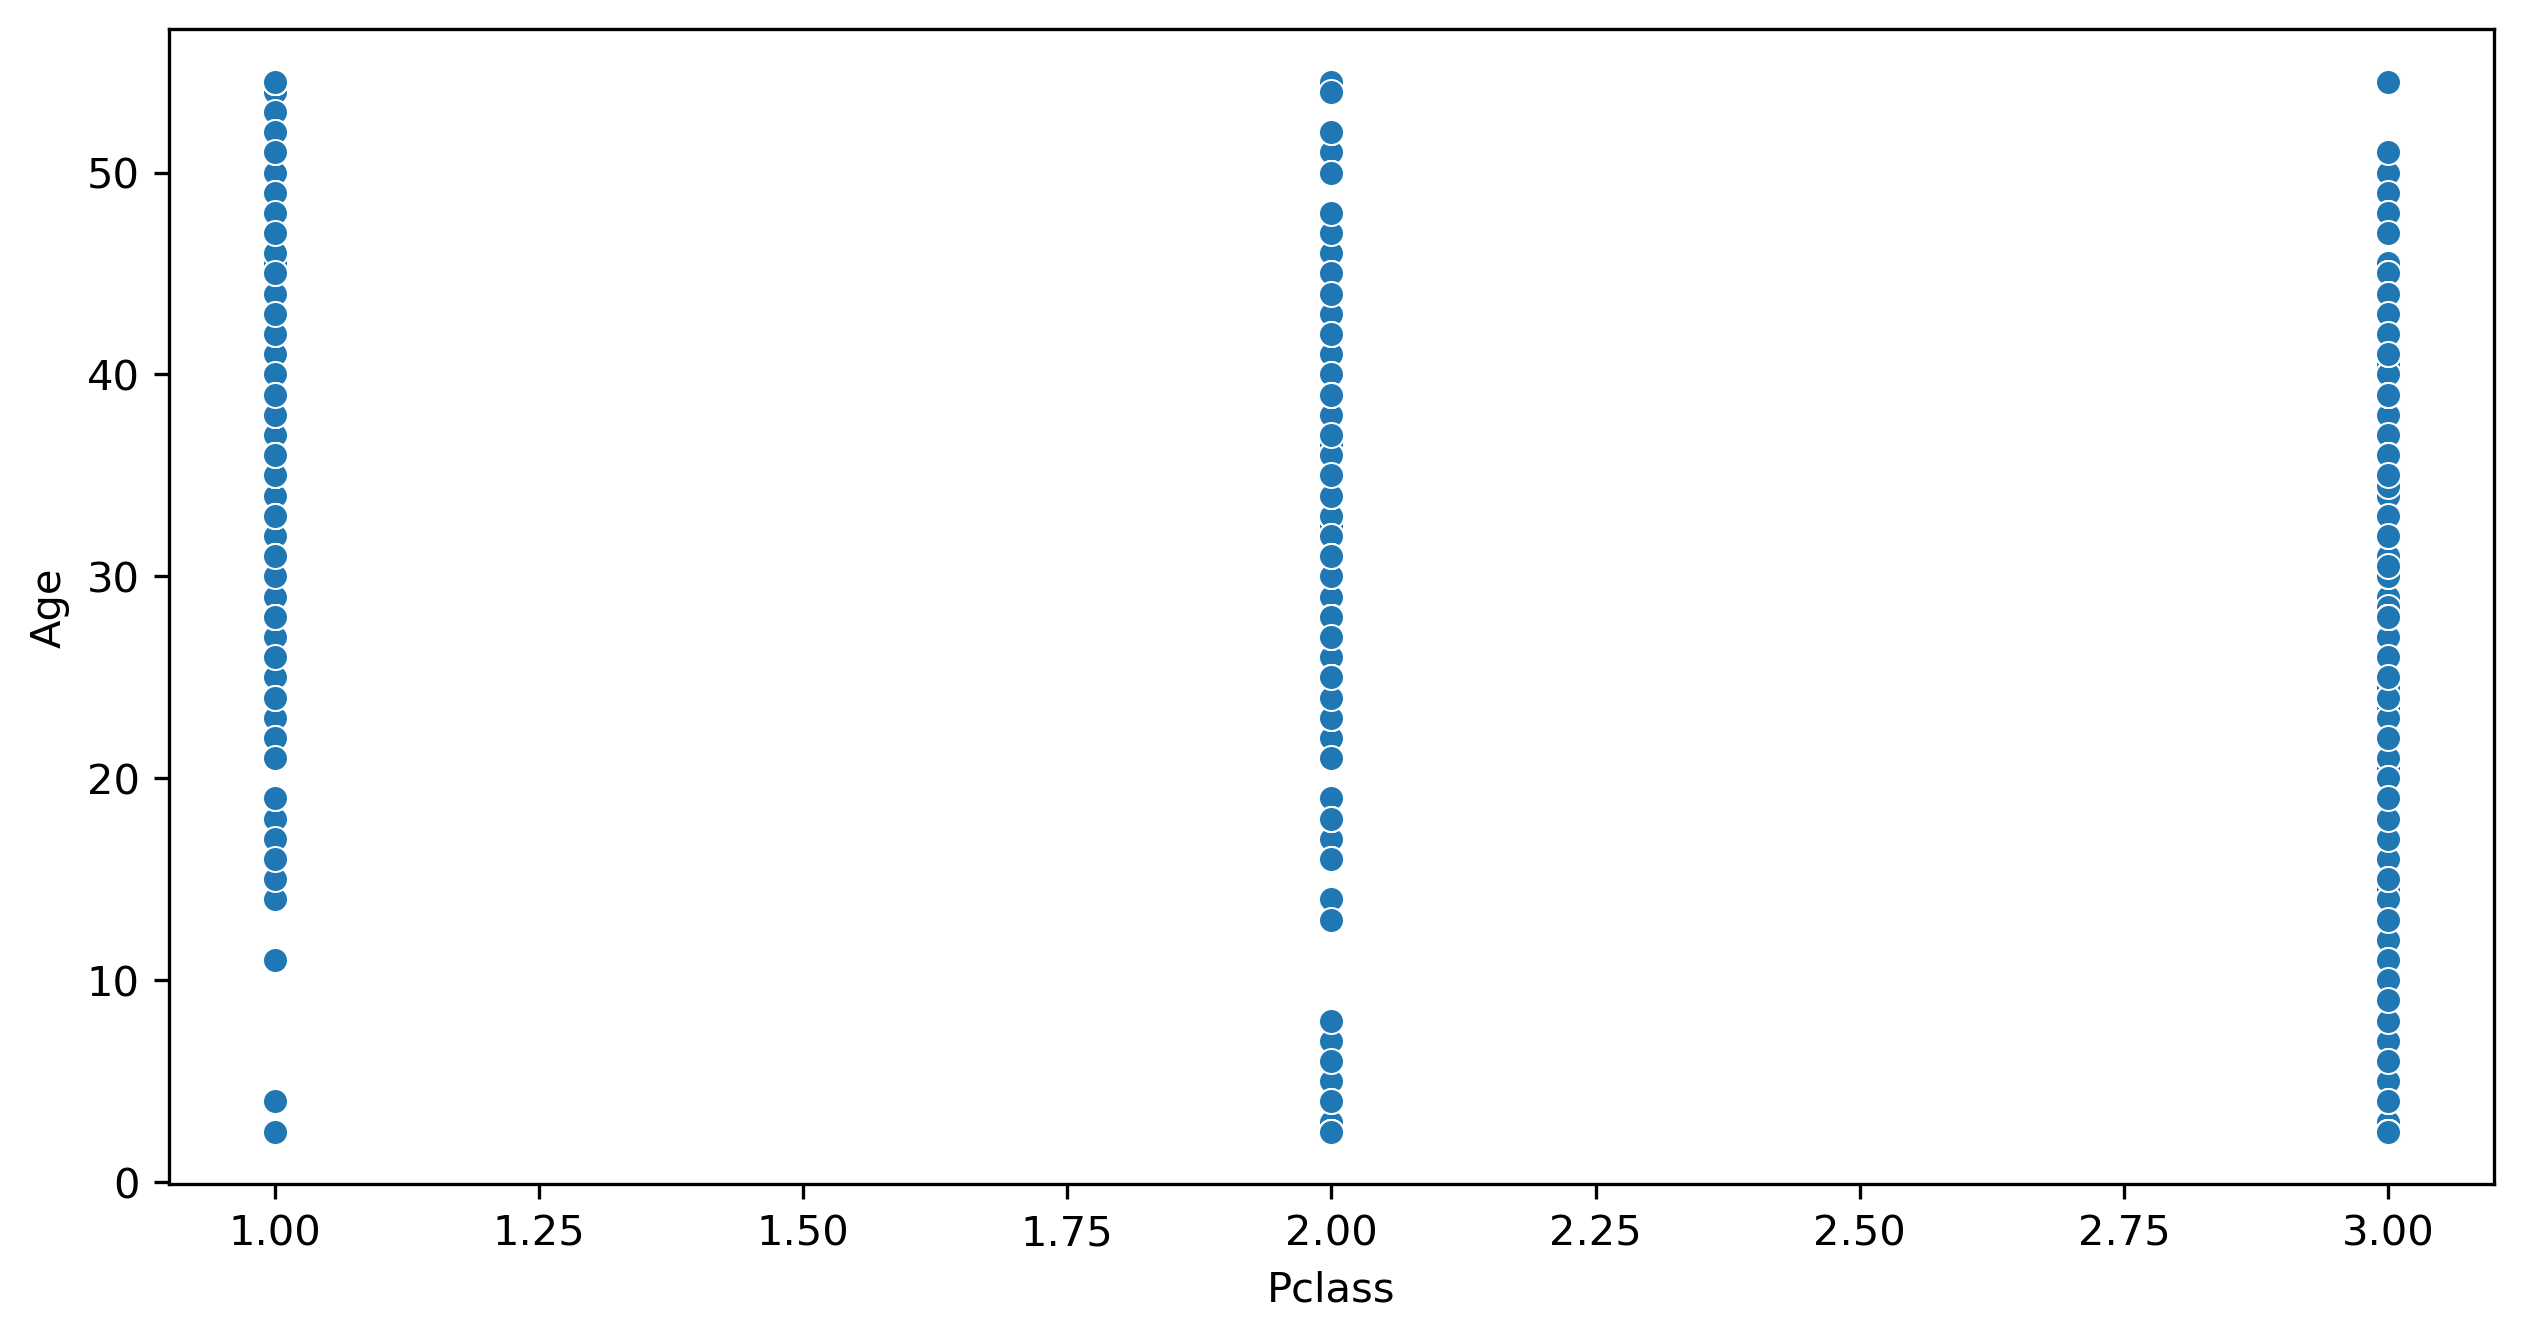

In [27]:
sns.scatterplot(x = df['Pclass'], y =df['Age'])

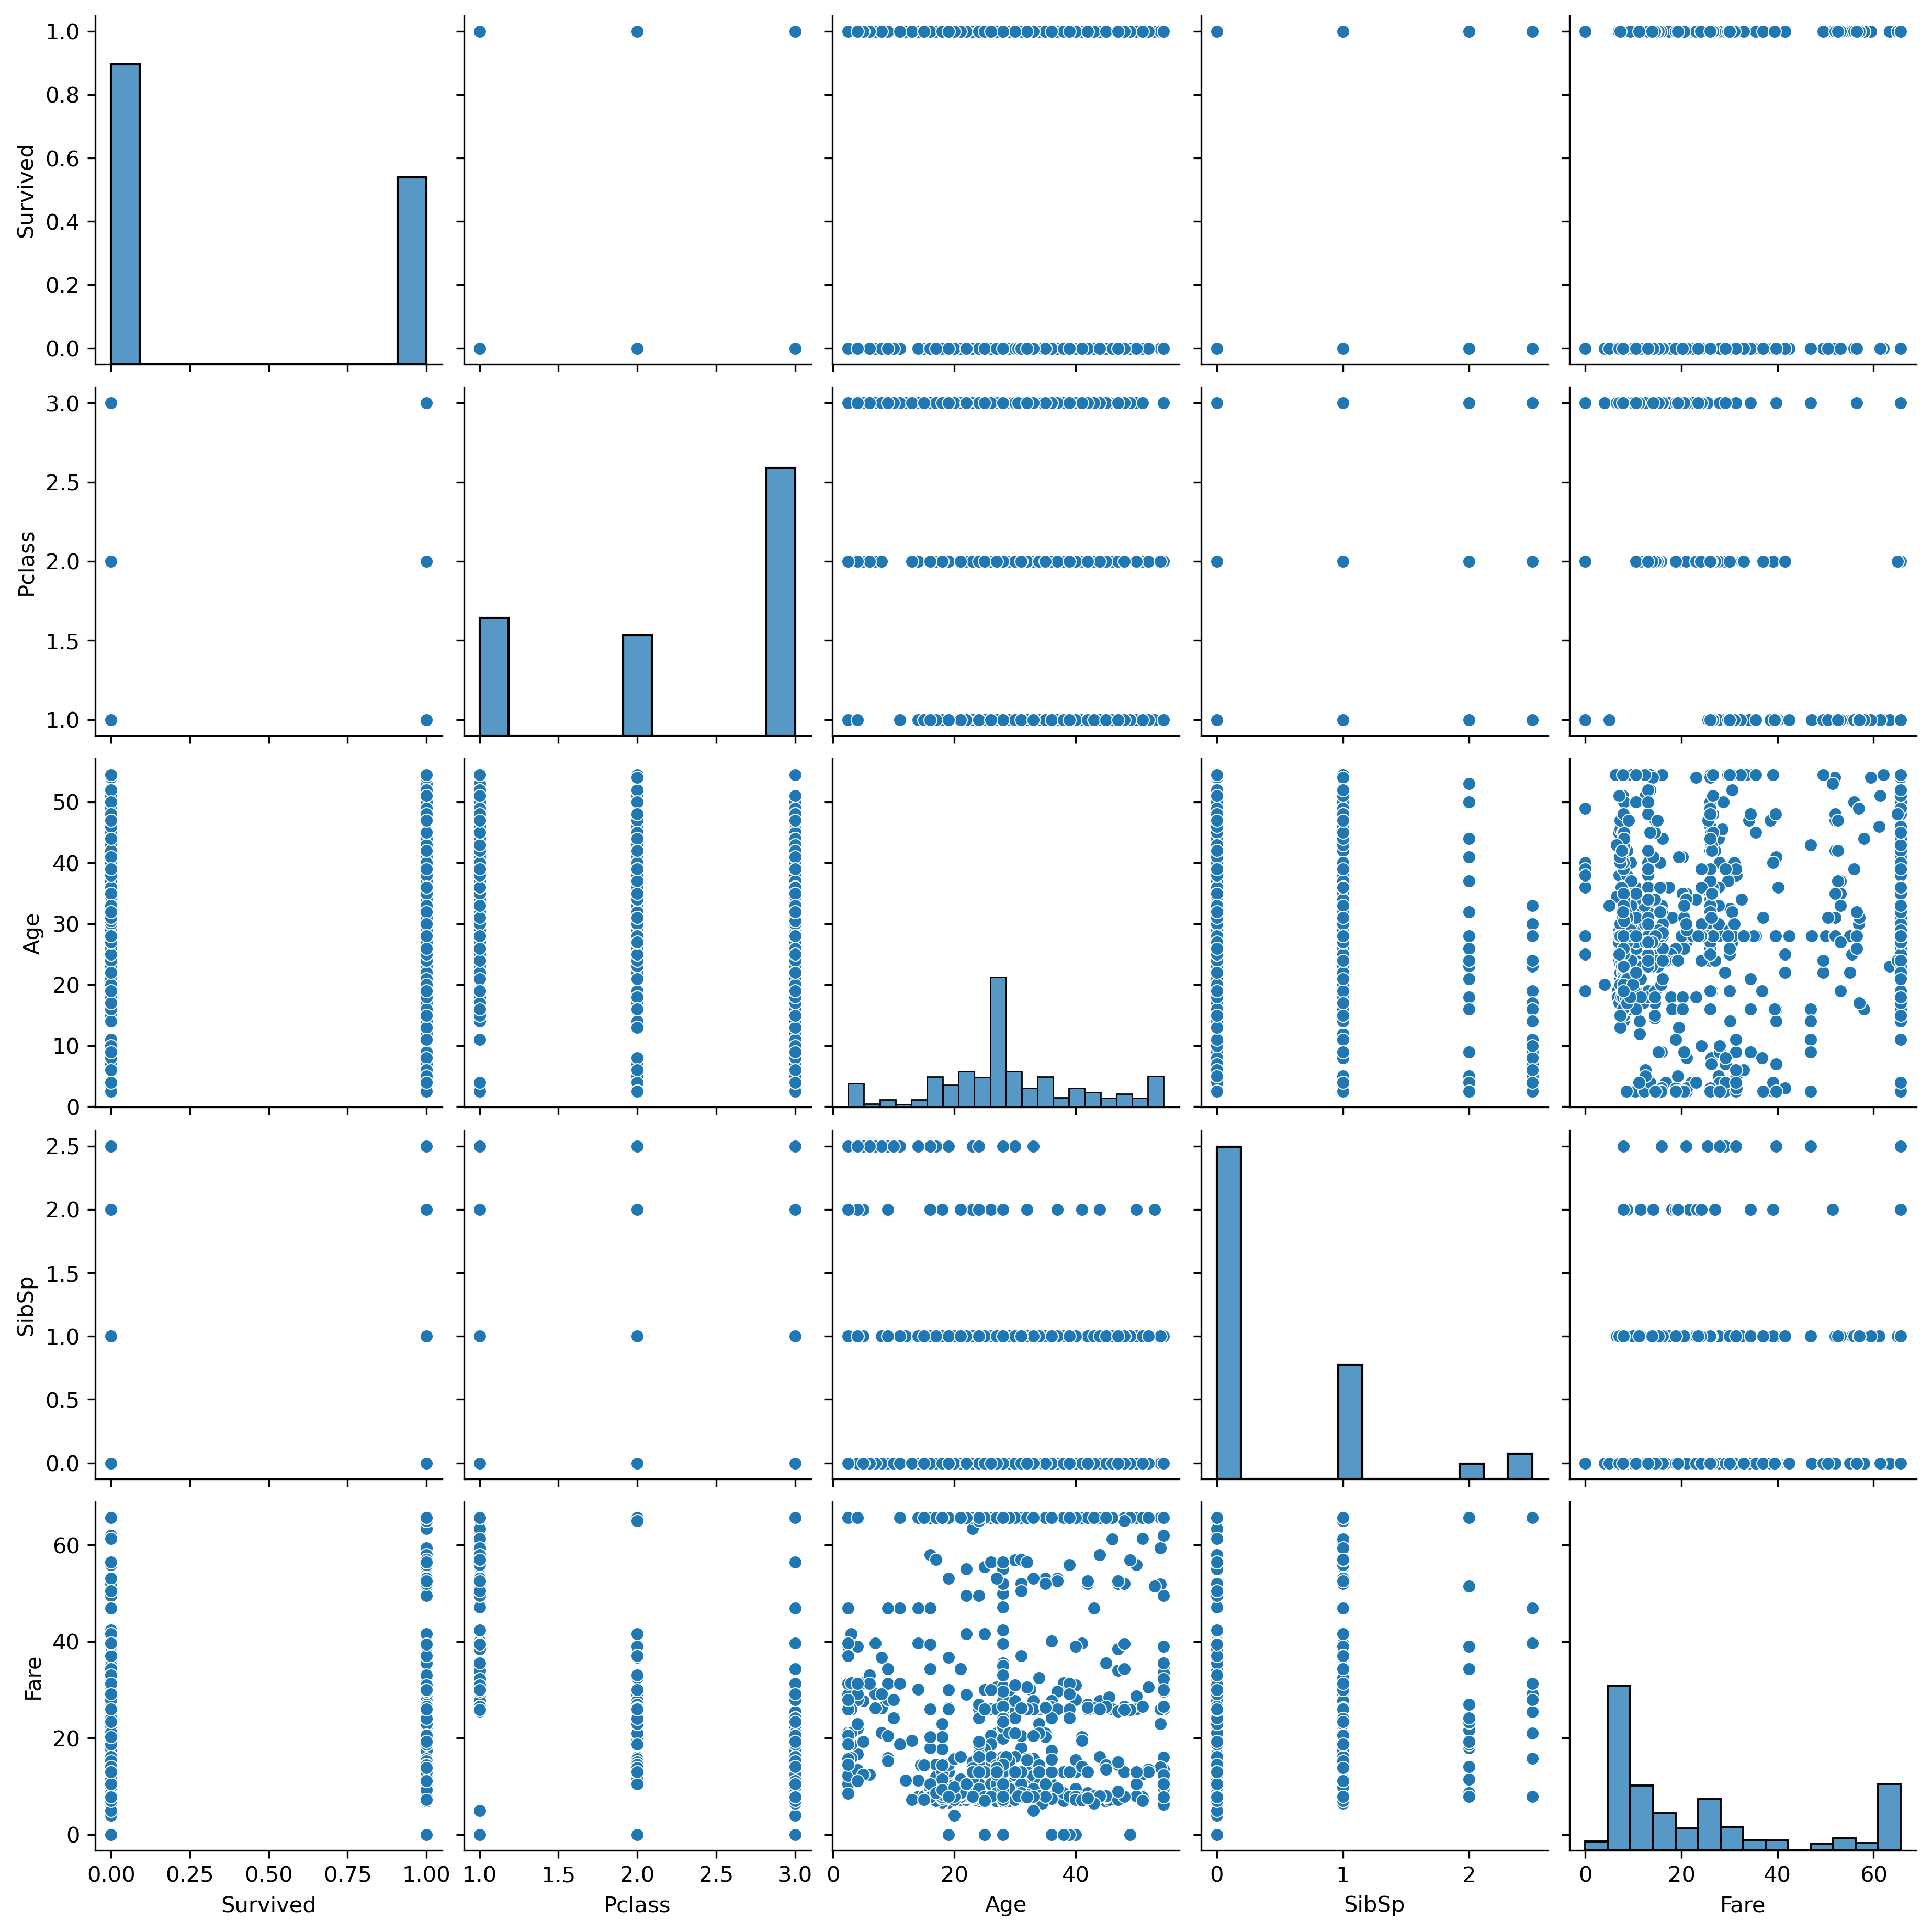

In [28]:
sns.pairplot(df)

In [29]:
#Correlation coefficient
import warnings
warnings.filterwarnings('ignore')
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.060622,0.031434,0.317430
Pclass,-0.338481,1.000000,-0.340404,0.023180,-0.715300
Age,-0.060622,-0.340404,1.000000,-0.247806,0.144544
SibSp,0.031434,0.023180,-0.247806,1.000000,0.349615
Fare,0.317430,-0.715300,0.144544,0.349615,1.000000


<Axes: >

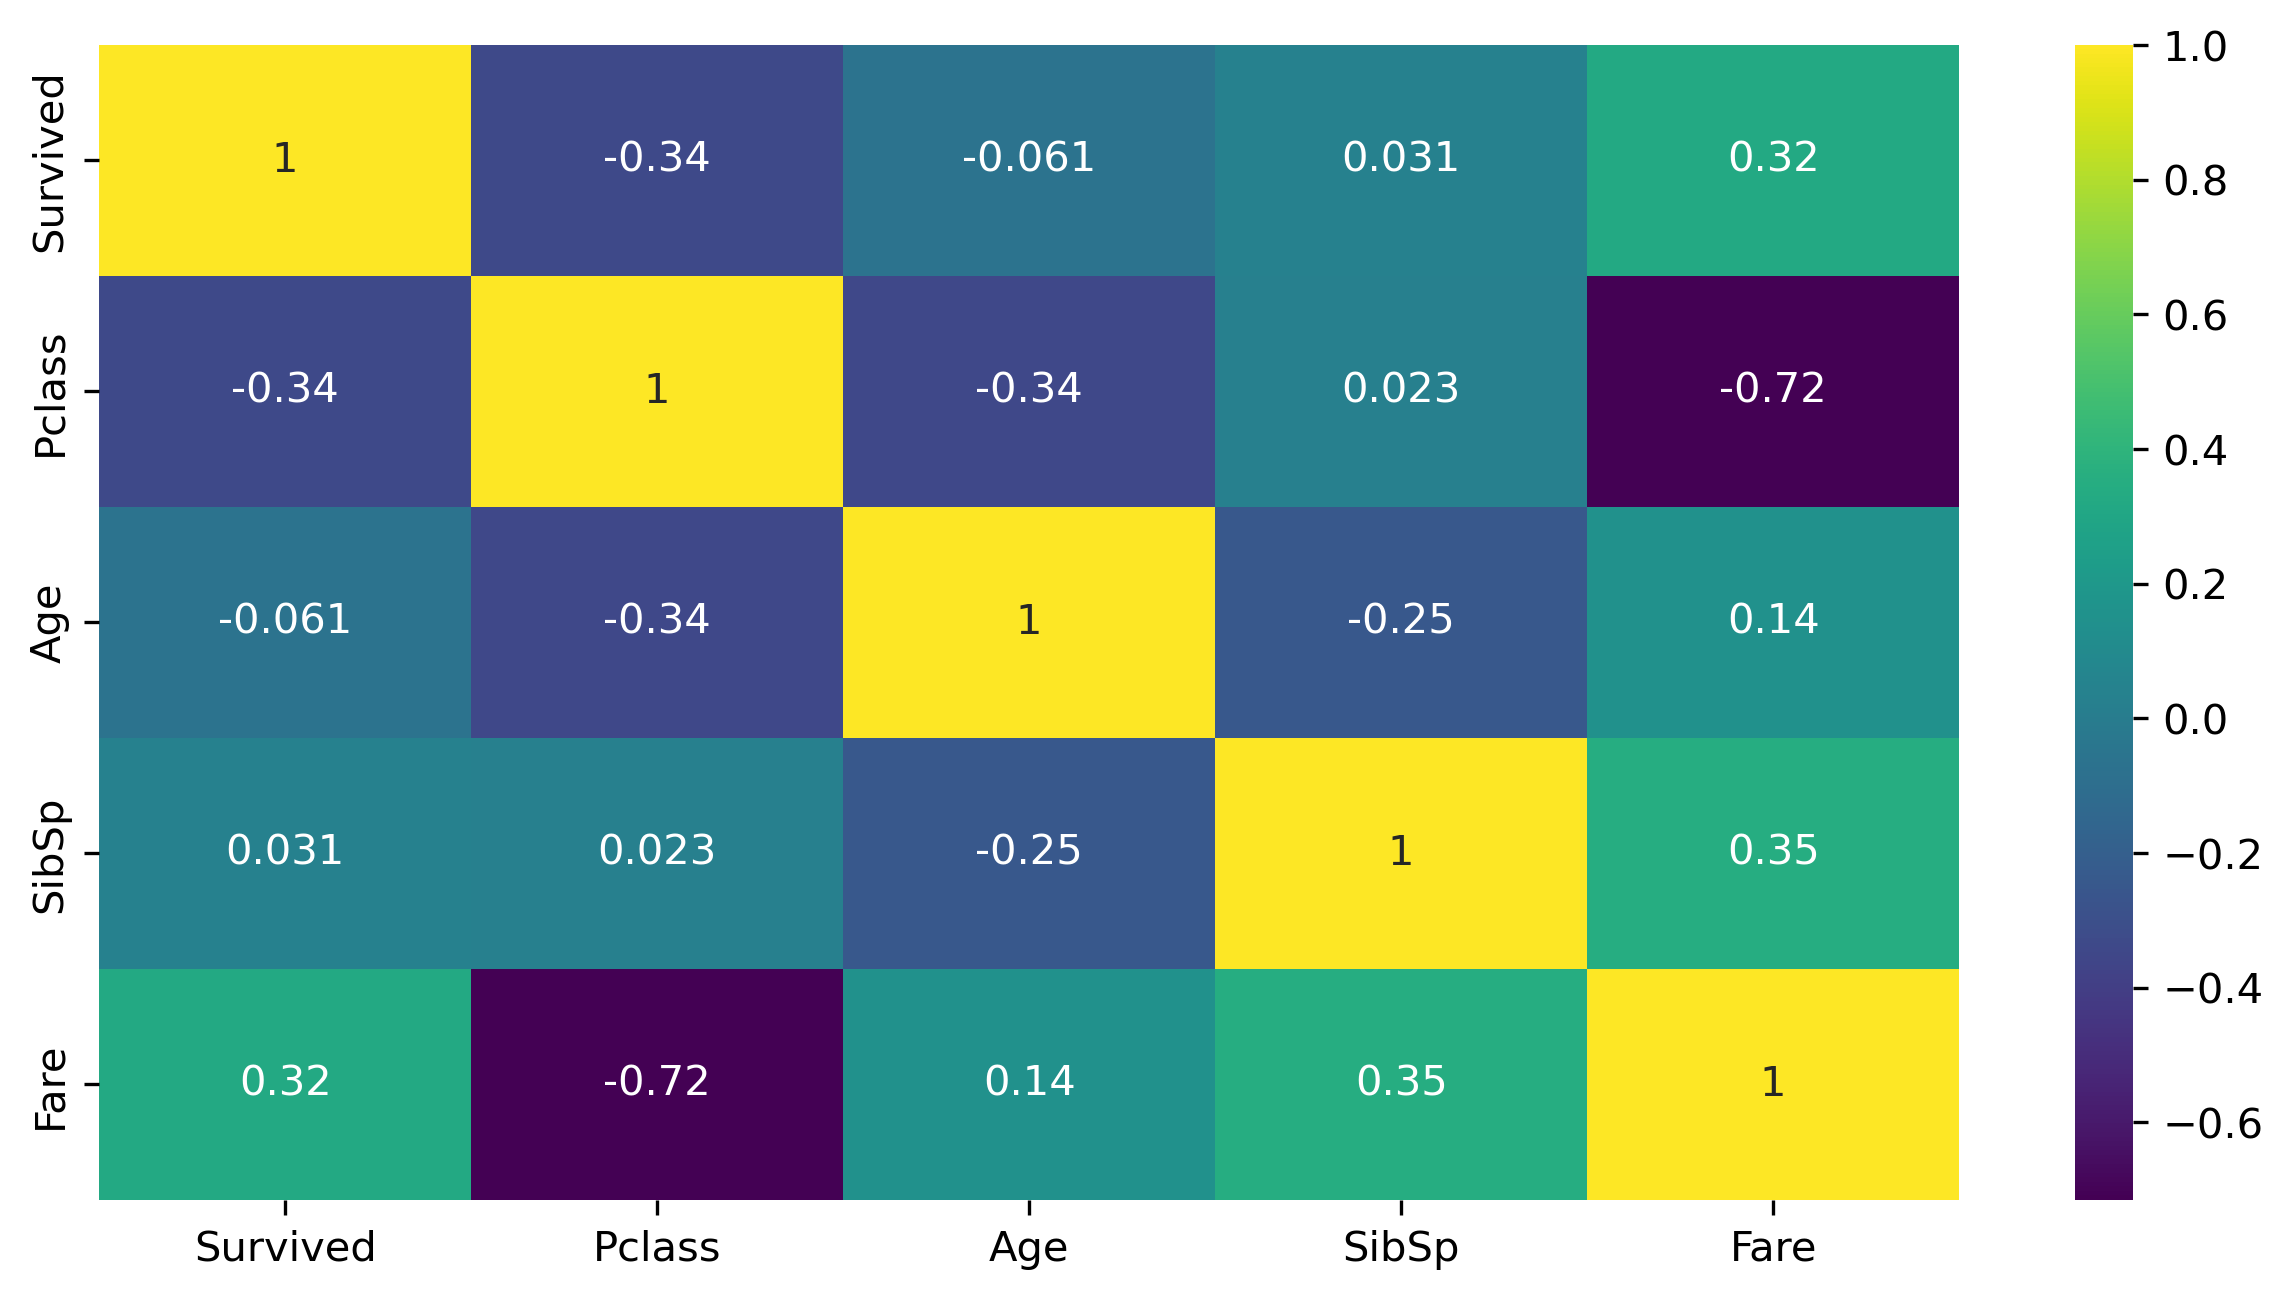

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

In [31]:
#one hot encoding
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,7.2500,S
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,65.6344,C
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,7.9250,S
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,53.1000,S
4,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,8.0500,S


In [32]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['Name', 'Sex', 'Embarked'], dtype='object')

In [33]:
df[cat_cols]

,Name,Sex,Embarked
0,"Braund, Mr. Owen Harris",male,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,"Heikkinen, Miss. Laina",female,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,"Allen, Mr. William Henry",male,S
...,...,...,...
886,"Montvila, Rev. Juozas",male,S
887,"Graham, Miss. Margaret Edith",female,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,S
889,"Behr, Mr. Karl Howell",male,C


In [34]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [35]:
df['Survived'].unique()

array([0., 1.])

<Axes: xlabel='count', ylabel='Survived'>

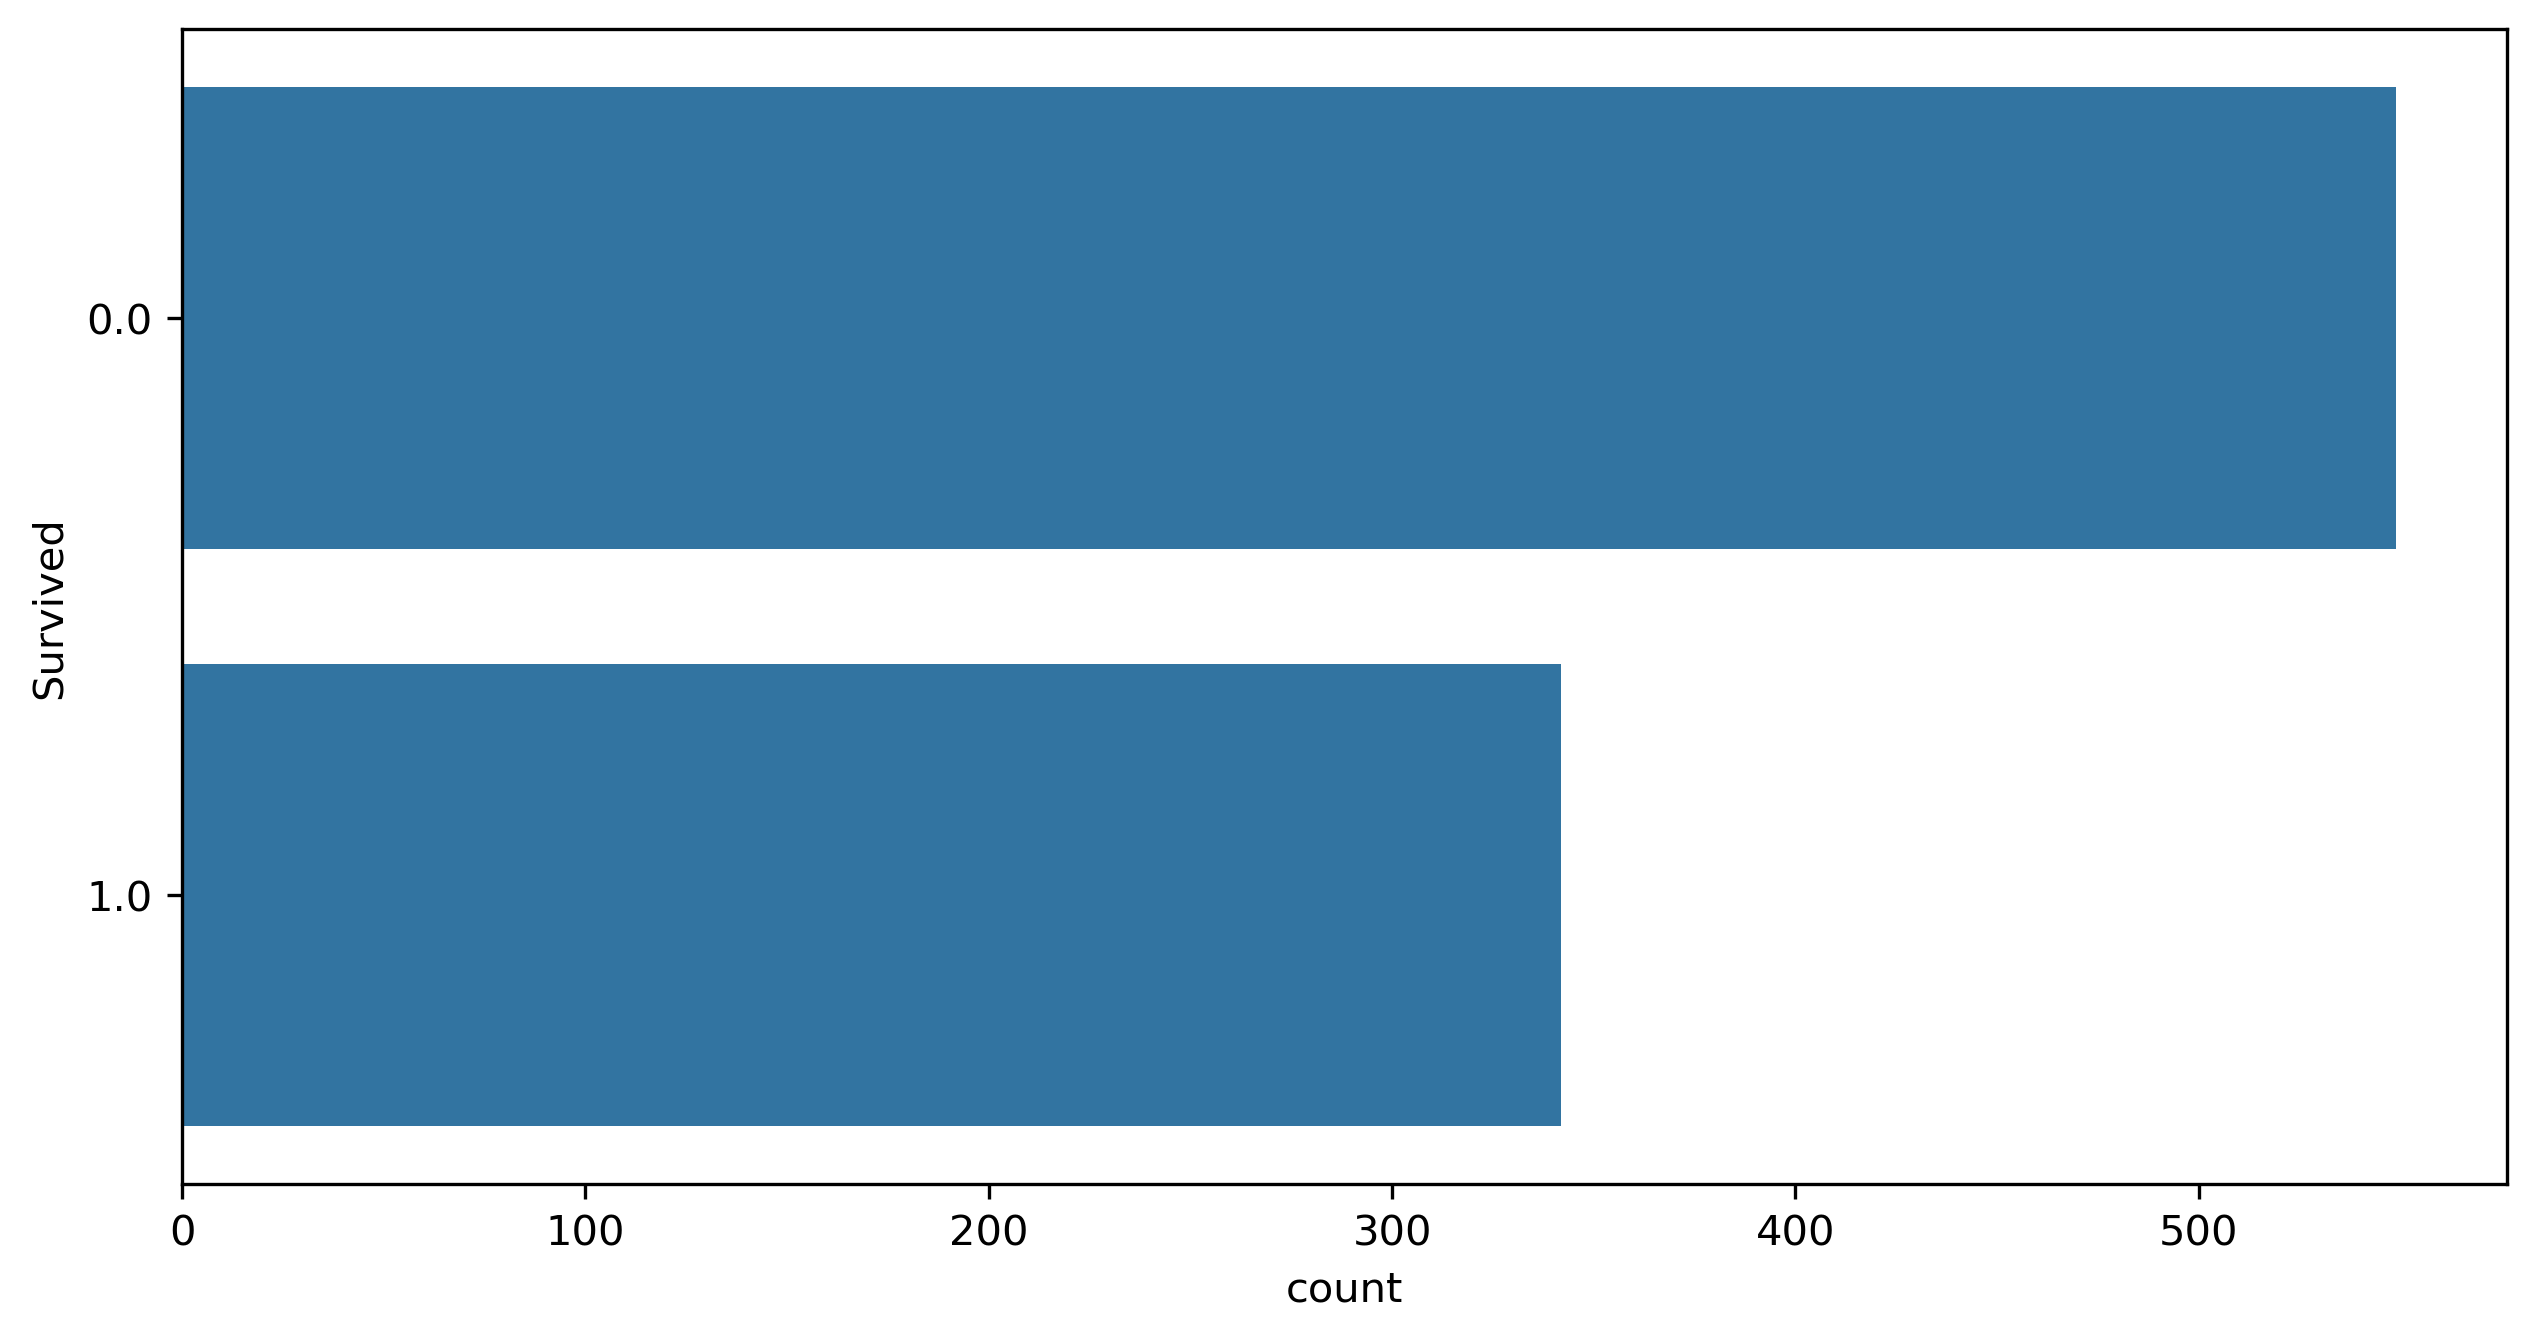

In [36]:
sns.countplot(y = df['Survived'])

In [37]:
x = df.iloc[:,1:]
y = df['Survived']

In [38]:
x

,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,3.0,108.0,1.0,22.0,1.0,7.2500,2.0
1,1.0,190.0,0.0,38.0,1.0,65.6344,0.0
2,3.0,353.0,0.0,26.0,0.0,7.9250,2.0
3,1.0,272.0,0.0,35.0,1.0,53.1000,2.0
4,3.0,15.0,1.0,35.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2.0,548.0,1.0,27.0,0.0,13.0000,2.0
887,1.0,303.0,0.0,19.0,0.0,30.0000,2.0
888,3.0,413.0,0.0,28.0,1.0,23.4500,2.0
889,1.0,81.0,1.0,26.0,0.0,30.0000,0.0


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [41]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [43]:
ytrain

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [45]:
prediction(XGBClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7835820895522388
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [46]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
# perform hyperparameter tunning
params = {
    'n_estimators' : [150,200,300],
    'learning_rate' : [0.1,0.2,0.5,0.7],
    'max_depth' : [2,4,6,8],
    'subsample':[0.2,0.3,0.4,0.5]
    
}

In [59]:
grid = GridSearchCV(XGBClassifier(), params, verbose=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 0.7],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [150, 200, 300],
                         'subsample': [0.2, 0.3, 0.4, 0.5]},
             verbose=-1)

In [60]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.4}

In [57]:
prediction(XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=150,subsample=0.4))

Train Accuracy: 0.8828250401284109
Test Accuracy: 0.8283582089552238
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.72      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [50]:
prediction(XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60,subsample=0.6))

Train Accuracy: 0.85553772070626
Test Accuracy: 0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [51]:
prediction(LGBMClassifier())

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [52]:
LGBMClassifier()

LGBMClassifier()

In [53]:
# perform hyperparameter tunning
params_1 = {
    'n_estimators' : [50,100,150],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,4,5],
    'subsample':[0.8,0.9,1.0]
    
}

In [54]:
grid = GridSearchCV(XGBClassifier(), params_1, verbose=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=-1)

In [55]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

In [64]:
#it is not give the generalized model after performing hyperparameter tunning
prediction(LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=50,subsample=0.8))

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [56]:
#soprediction(LGBMClassifier(learning_rate=0.1, max_depth=1, n_estimators=90,subsample=0.3))

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
